In [1]:
import os

import numpy as np
from glob import glob

import itk

import site
site.addsitedir("../../../../wrapping")
site.addsitedir("../..")

from ARGUS_IO import *

from ARGUS_pretrain_ar_inference import ARGUS_pretrain_ar_inference

In [2]:
pretrain_ar = ARGUS_pretrain_ar_inference(source="Butterfly", config_file_name="../../ARGUS_pretrain_ar.cfg", network_name="final", device_num=0)
files = glob("PNB Test Data/*mp4")
vid = ARGUS_load_video(files[0])
pretrain_ar.preprocess(vid)
img = pretrain_ar.input_image
img_file = os.path.split(files[0])[1]
itk.imwrite(img, os.path.join("PNB-MHA", img_file[:-3]+"mha"))

itkImageF4 not loaded from module TubeTK because of exception:
 module 'itk.TubeTKPython' has no attribute 'itkImageF4'
vectoritkImageF4 not loaded from module TubeTK because of exception:
 module 'itk.TubeTKPython' has no attribute 'vectoritkImageF4'


(12, 320, 320)
12


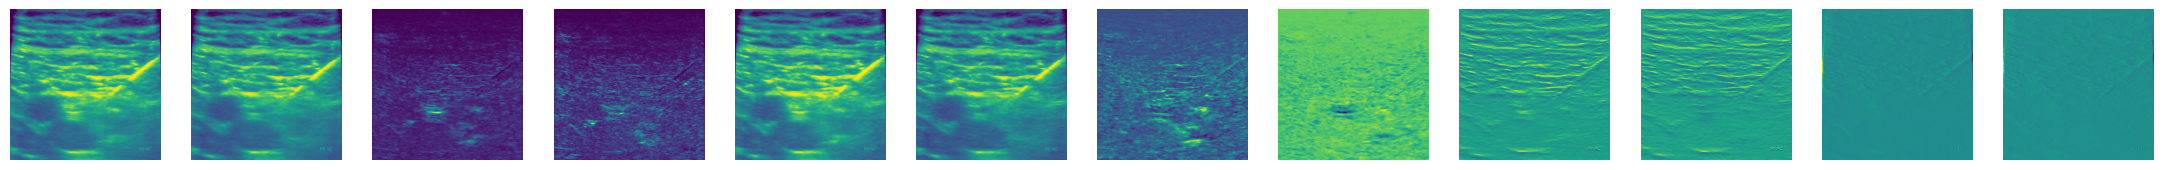

In [5]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

arr = pretrain_ar.input_array
print(arr.shape)
num_channels = arr.shape[0]
print(num_channels)
plt.figure(figsize=[30, 10])
for c in range(num_channels):
    plt.subplot(
        2,
        num_channels + 1,
        (num_channels + 1) + c + 1,
    )
    plt.axis('off')
    plt.imshow(arr[c, :, :])
plt.show()

In [4]:
for file in files:
    vid = ARGUS_load_video(file)
    pretrain_ar.preprocess(vid)
    img = pretrain_ar.input_image
    img_file = os.path.split(file)[1]
    itk.imwrite(img, os.path.join("PNB-MHA", img_file[:-3]+"mha"))